In [49]:
import numpy as np
import pandas as pd
import random
from typing import List, Tuple
from IPython.display import Image
import tokenize_uk

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

In [4]:
from collocations.collocation_extractor import StanfordNLPCollocationExtractor

In [5]:
from enum import IntEnum
class Category(IntEnum):
    STAFF = 0,
    FACILITIES = 1, 
    CLEANLINESS = 2, 
    COMFORT = 3,
    VALUE_FOR_MONEY = 4,
    LOCATION = 5,
    NOISE = 6,
    WIFI = 7,
    OTHERS = 8

class SentimentType(IntEnum):
    NEGATIVE = 0, 
    NEUTRAL = 1,
    POSITIVE = 2

In [125]:
class StubModel:
    
    RANDOM_NUM = 10
    
    def __init__(self, df):
        self.df = df
        self.collocation_extractor = StanfordNLPCollocationExtractor()
    
    def acquire_collocations_for_hotel(self, hotel_name) -> List[str]:
        hotel_df = self.df.loc[ self.df['hotel'] == hotel_name]
        
        if len(hotel_df) == 0:
            return []
        
        title_list = random.sample(set(self.df['title'].values), self.RANDOM_NUM)
        pos_list = random.sample(set(self.df['pos_text'].values), self.RANDOM_NUM)
        neg_list = random.sample(set(self.df['neg_text'].values), self.RANDOM_NUM)
        
        collocations = self.collocation_extractor.extract_from_list_of_text(title_list + pos_list + neg_list)
        
        return collocations
    
    def cluster_collocations(self, collocations: List[str], k: int):
        random.shuffle(collocations)
        size = len(collocations)
        assert size > k
        n = size // k
        start = 0
        result = []
        for i in range(0, k):
            item = collocations[start: start+n]
            result.append(item)
            
            start += n
            
        return result
    
    
    def detect_cluster_category(self, clusters: List[List[Tuple[str, str]]]) -> List[Category]:
        size = len(clusters)
        
        return random.choices(list(Category), k = size)
    
    def detect_sentiment_of_category(self, category_collocations: List[str], category: Category) -> SentimentType:
        return random.choice(list(SentimentType))
    
    def detect_sentiments_of_categories(self, category_collocations_list: List[List[str]], categories: List[Category]):
        assert len(category_collocations_list) == len(categories)
        
        result = []
        for i in range(0, len(categories)):
            sentiment = self.detect_sentiment_of_category(category_collocations_list[i], categories[i])
            result.append(sentiment)
            
        return result
    
    
    
    def generate_summary_for_hotel(self, hotel: str):
        k = 10
        collocations = self.acquire_collocations_for_hotel(hotel)
        clusters = self.cluster_collocations(collocations, k=k)
        categories = self.detect_cluster_category(clusters)
        sentiments = self.detect_sentiments_of_categories(clusters, categories)
        
        result = {sent: [] for sent in list(SentimentType)}
        for i in range(0, k):
            num = random.choice([1, 2, 3])
            phrases = random.choices(clusters[i], k= num)
            phrase = ""
            for j in range(0, len(phrases)):
                result[sentiments[i]].append(f"{phrases[j][0]} {phrases[j][1]}")
                                        
        return result


In [126]:
random.choices([1, 2, 3], k=2)

[2, 2]

In this project there will be several metrics at each different steps. 

##### Example of booking.com data

In [10]:
example_df = pd.read_csv('/home/dbabenko/DS/NLP/Detect-emotion-sentimental/dataset/booking/lviv-reviews.csv')

In [11]:
example_df.head()

,title,pos_text,neg_text,ratingValue,bestRating,hotel
0,Затишний готель в центрі міста.,Затишний готель в центрі міста. Поряд зупинка ...,Відсутність ліфту.,10.0,10.0,angel.uk.html
1,Чудовий готель!,Чудовий готель!!! Співвідношення ціна-якість!!...,Nan,10.0,10.0,angel.uk.html
2,Хороший готель в який хочеться повернутися,Дуже хороше розташування готелю . Смачний і рі...,На четвертий поверх без ліфта важкувато підій...,9.0,10.0,angel.uk.html
3,Не судіть про готель по його входу) Plaza - це...,"Дуже привітний персонал, доволі великий номер ...","Екстер'єр, ніколи би не подумав, що через таки...",8.8,10.0,angel.uk.html
4,"Смачно і чисто, але вночі галасливо!","Готель чудовий, персонал привітний, сніданок с...","Але спати неможливо, бо ніхто не втихомирює ту...",7.9,10.0,angel.uk.html


In [127]:
stub_model = StubModel(example_df)

Use device: gpu
---
Loading: tokenize
With settings: 
{'model_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu_tokenizer.pt', 'lang': 'uk', 'shorthand': 'uk_iu', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu_tagger.pt', 'pretrain_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu.pretrain.pt', 'lang': 'uk', 'shorthand': 'uk_iu', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu_lemmatizer.pt', 'lang': 'uk', 'shorthand': 'uk_iu', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu_parser.pt', 'pretrain_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu

As an example of reviews data from one of the potential resources ( *booking.com* ) see above. 

### Collocations

Let's consider review comments about Blum hotel in Lviv (https://www.booking.com/hotel/ua/blum.en-gb.html?aid=318615;label=New_English_EN_ALL-GBIECAUS_5226333385-zrfE0CU6K_HWeoloJw%2APrQS217244291991%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg;sid=d7dcfa602c9b27d163fa668f6f1f1bc9;dest_id=-1045268;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=1;hpos=1;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1586971573;srpvid=35487a9ad1180088;type=total;ucfs=1&#tab-reviews )

In [2]:
blum_df = example_df.loc[example_df['hotel'] == 'blum.uk.html']
blum_df.head(10)

,title,pos_text,neg_text,ratingValue,bestRating,hotel
2031,Розташування,Розташування,Брудні і обшарпані стіни номеру Дуже жарко в н...,5.0,10.0,blum.uk.html
2032,"Персонал привітний, швидко вирішує усі питання.","Персонал привітний, швидко вирішує усі питання...",Одну з ночей хтось постійно ходив по коридору ...,8.8,10.0,blum.uk.html
2033,"Розташування, співвідношення ціни та якості, с...","Розташування, співвідношення ціни та якості, с...","Було б непогано мати чайник в номері, чай та к...",10.0,10.0,blum.uk.html
2034,Все супер. Рекомендую,"Знаходиться не далеко від центру, близько всі ...","Запах в номері, якійсь був солодкий, напевно в...",9.2,10.0,blum.uk.html
2035,"Хороший готель, схований від шумного центру, т...","Хороший готель, схований від шумного центру, т...","шумоізоляція, та досить велика щілина внизу дв...",9.6,10.0,blum.uk.html
2036,Сніданок неперевершений.,Сніданок неперевершений. Необмежена кількість ...,звукоізоляція могла б бути і кращою . Не зайви...,9.2,10.0,blum.uk.html
2037,Чудове місце для короткочасних поїздок,"Гарний дизайн готелю, чудове розташування, при...","Сніданок в ціні номеру міг бути більшим, до ка...",8.3,10.0,blum.uk.html
2038,Затишний готель у серці Львова;,Затишний готель у серці Львова; привітний нена...,"Сніданок: хотілося б шведський стіл, а не кіль...",8.8,10.0,blum.uk.html
2039,наступної мандрівки до Львова оберемо цей готель.,Відмінне розташування готелю! Дуже близько до ...,"один маленький мінус, але нам це не завдало не...",10.0,10.0,blum.uk.html
2040,"Сніданок - великі порції, смачно!","Сніданок - великі порції, смачно! 1 страва без...",Сам готель усередині нагадує гуртожиток чи хос...,6.3,10.0,blum.uk.html


Acquire simple baseline collocations for this hotel 

In [66]:
blum_collocations = stub_model.acquire_collocations_for_hotel('blum.uk.html')
blum_collocations

[('зупинитися', 'ніч'),
 ('нормально', 'зупинитися'),
 ('місце', 'однозначно'),
 ('місце', 'тепер'),
 ('місце', 'улюблене'),
 ('місце', 'зупинки'),
 ('зупинки', 'львові'),
 ('персонал', 'новеньке'),
 ('новеньке', 'прекрасний'),
 ('кава', 'безкоштовна'),
 ('персонал', 'кава'),
 ('кава', 'чай'),
 ('погана', 'занадто'),
 ('шумоізоляція', 'погана'),
 ('шумоізоляція', 'чути'),
 ('кашляє', 'як'),
 ('чути', 'кашляє'),
 ('близько', 'дуже'),
 ('центру', 'близько'),
 ('розташування', 'центру'),
 ('персонал', 'привітний'),
 ('центру', 'персонал'),
 ('супер', 'місце'),
 ('місце', 'розташування'),
 ('враження', 'чудові'),
 ('місце', 'чудове'),
 ('місце', 'туристів'),
 ('відпочивали', 'групою'),
 ('групою', 'дітей'),
 ('кухня', 'загальна'),
 ('є', 'кухня'),
 ('чаєм', 'безкоштовним'),
 ('кухня', 'чаєм'),
 ('чаєм', 'кавою'),
 ('розташування', 'хороше'),
 ('порадувало', 'розташування'),
 ('площі', 'близько'),
 ('площі', 'центральної'),
 ('розташування', 'площі'),
 ('номер', 'затишний'),
 ('порадувало',

It is baseline example of collocations based on: noun + verb, verb + noun, adjective + noun, adverb + verb. The algorithm for exatrction collocations like importnat phrase will be improved. 

### Clustering colloocation into categories | metric

After acquiring collocations, we would like to cluster it into groups. As it is unsupervised learning task, it is hard to measure the quality of this algorithm. There are some assesment metrics for clustering algorithms like Davies-Bouldin Index, Dunn Index, Silhouette Coefficient ( https://medium.com/@ODSC/assessment-metrics-for-clustering-algorithms-4a902e00d92d ). As an example, we wil select Dunn Index: <br>
$D = \frac{ min_{1 \le i < j \le n}d(i, j)}{max_{1 \le k \le n}d'(k)}$, <br>
where i, j and k are each indices for clusters, d measures the inter-cluster distance and d’ measures the intra-cluster difference. <br/>
TODO: give an argument why choose Dunn Index for this task

But, the quality of clusterring depends on the distance function. It this case dictance function can be  cosine similarty between two vectors (each of them represent collocation via pre-trained embedding). However, such case of distance function depends on embeddings, which can be good for one domain but not so good for others. In our case it is important to consider synonims ("шумоізоляція", "звукоізоляція") and for the determing the group noun is more important than adjective, so probably we wiil implemnent custom distance function for this.

In [73]:
cluster_collocations = stub_model.cluster_collocations(blum_collocations, 5)
cluster_collocations

[[('займає', 'телевізор'),
  ('довелося', 'іти'),
  ('відкриваються', 'дуже'),
  ('номер', 'затишний'),
  ('відгуків', 'позитивних'),
  ('місце', 'чудове'),
  ('зупинитися', 'ніч'),
  ('номер', 'хороший'),
  ('вище', 'чомусь'),
  ('переїхати', 'кімнату'),
  ('двері', 'середини'),
  ('дрібниць', 'необхідних'),
  ('чаєм', 'безкоштовним'),
  ('автобусі', 'міському'),
  ('враження', 'чудові'),
  ('персонал', 'кава'),
  ('номер', 'мансарді'),
  ('ціни', 'бар'),
  ('апартаменти', 'грибком'),
  ('площі', 'близько'),
  ('выбирает', 'тут'),
  ('ліжком', 'розкладкою'),
  ('половину', 'ночі'),
  ('ціна', 'номер'),
  ('поселили', 'номер'),
  ('хостела', 'проблема'),
  ('центру', 'персонал'),
  ('далеко', 'досить'),
  ('розташування', 'чистота'),
  ('звик', 'прибирати'),
  ('знаходиться', 'далеко'),
  ('відповідає', 'ціна'),
  ('є', 'кухня'),
  ('вирішили', 'довелося'),
  ('будинку', 'ліфта'),
  ('рівні', 'вищому'),
  ('чисто', 'номері'),
  ('подовжили', 'тому'),
  ('поставити', 'речі'),
  ('неприй

Example of potential visualization of this cluster is described bellow (*it not result of the presented algorithm here, it is example of another algorithm*)

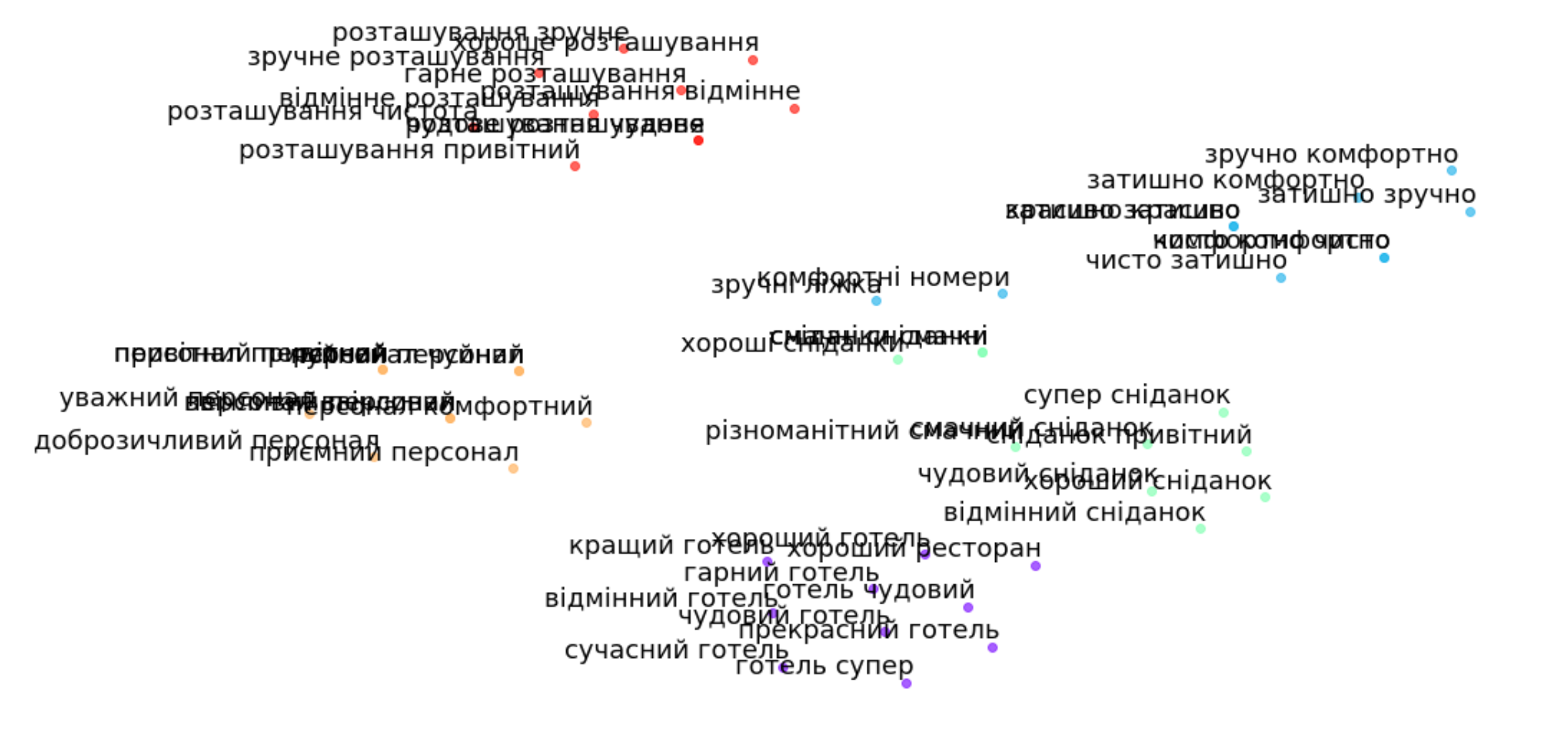

In [78]:
Image("data/cluster_example.png")

### Detect the category of  the cluster | Metric

If we have annotated data for each cluster (see example bellow), which can be impossible in our case, we can compare the detection result with ground truth. The accurancy at this case for one hotel would have the simple primitive formula: <br/>
$acc = \frac{\text{num of macthed categories}}{\text{num of clusters}}$ ,<br>
where *num of macthed categories* - number of clusters where detected category mathced with ground truth <br>
*num of clusters* - number of clusters for this hotel, be aware that each cluster should have unique category. 

As there no such kind of annoted data, we can compare the detection result with another method. For example, let's calculate this accuracy for blum hotel (as we have stub model which genegarte random result 2 different experiments will give us different result).

In [80]:
annotated_cluster = [
    (["співвідношення ціни"], Category.VALUE_FOR_MONEY),
    (["персонал ввічливий", "персонал хороший"], Category.STAFF),
    (["стіни брудні"], Category.CLEANLINESS),
    (["звукоізоляція погана", "відсутність шумоізоляції"], Category.NOISE),
    (["відсутність ліфту"], Category.COMFORT ),
    (["локація чудова", "розташування гарне"], Group.LOCATION)
]

In [89]:
categories1 = stub_model.detect_cluster_category(cluster_collocations)
categories1

[<Category.COMFORT: 3>,
 <Category.CLEANLINESS: 2>,
 <Category.VALUE_FOR_MONEY: 4>,
 <Category.WIFI: 7>,
 <Category.CLEANLINESS: 2>]

In [88]:
categories2 = stub_model.detect_cluster_category(cluster_collocations)
categories2

[<Category.COMFORT: 3>,
 <Category.OTHERS: 8>,
 <Category.COMFORT: 3>,
 <Category.NOISE: 6>,
 <Category.COMFORT: 3>]

In [92]:
def calc_categories_match_acc(categories, etalon_categories):
    assert len(categories) == len(etalon_categories)
    size = len(categories)
    if size == 0:
        return None
    num_of_matched = 0
    for i in range(0, size):
        if categories[i] == etalon_categories[i]:
            num_of_matched += 1
    
    return num_of_matched / size
    

In [93]:
blum_category_acc = calc_categories_match_acc(categories2, categories1)
blum_category_acc

0.2

In case if we don't have annotaed ground truth data, it is also make sence to measure Cohen Kappa Score:

In [111]:
cohen_kappa_score(categories2, categories1)

0.09090909090909094

As it is classification problem (classify the category of the cluster) we  are going to  measure **precison**, **recall** and **F1-score** for each category.   

Let's consider the example for 10 hotels. Here we also compare the results between two method assuming that one of them give etalon result (it is just stub to show how metrics would like, in real case there shold be annotated data or another more accurate method ). 

In [99]:
hotels = random.sample(set(example_df['hotel'].values), 10)
hotels

['st-feder.uk.html',
 'coin-l-39-viv.uk.html',
 'edem.uk.html',
 'cisar-bankir.uk.html',
 'mini-freedom-mercurius.uk.html',
 'opera-passage-apartments.uk.html',
 'quot-kraft-quot-butic-apart.uk.html',
 'dd3-4ndud-n-ddud3-4ndud-n.uk.html',
 'fortress.uk.html',
 'viena.uk.html']

In [112]:
result, simulate_etalon_result = [], []
acc_df = {
    'hotel': [],
    'accuracy' : [],
    'cohen_kappa': []
}
for hotel in hotels:
    collocations = stub_model.acquire_collocations_for_hotel(hotel)
    clusters = stub_model.cluster_collocations(collocations, k = 5)
    
    simulate_etalon_categories = stub_model.detect_cluster_category(clusters)
    categories = stub_model.detect_cluster_category(clusters)
    
    acc_df['hotel'].append(hotel)
    acc_df['accuracy'].append(calc_categories_match_acc(categories, simulate_etalon_categories))
    acc_df['cohen_kappa'].append(cohen_kappa_score(categories, simulate_etalon_categories))
    
    simulate_etalon_result += simulate_etalon_categories
    result +=  categories

The accuracy and Cappa Cohen for each hotel are described bellow:

In [115]:
pd.DataFrame(acc_df)

,hotel,accuracy,cohen_kappa
0,39.uk.html,0.0,-0.086957
1,the-lion-s-castle.uk.html,0.2,0.090909
2,lviv-loft-apartments.uk.html,0.4,0.285714
3,urban.uk.html,0.2,0.090909
4,code-10-viv.uk.html,0.2,-0.111111
5,lviv-loft-construction.uk.html,0.0,-0.086957
6,george.uk.html,0.0,-0.041667
7,bank.uk.html,0.2,0.000000
8,apart-antares.uk.html,0.2,-0.052632
9,nadobu.uk.html,0.4,0.250000


The *Precision*, *Recall* and *F1-score* for each type of categories are presented bellow:

In [117]:
print(classification_report(simulate_etalon_result, result, target_names=[item.__str__() for item in list(Category)]))

                          precision    recall  f1-score   support

          Category.STAFF       0.12      0.33      0.18         3
     Category.FACILITIES       0.17      0.20      0.18         5
    Category.CLEANLINESS       0.25      0.20      0.22         5
        Category.COMFORT       0.12      0.11      0.12         9
Category.VALUE_FOR_MONEY       0.20      0.17      0.18         6
       Category.LOCATION       0.17      0.17      0.17         6
          Category.NOISE       0.00      0.00      0.00         3
           Category.WIFI       0.00      0.00      0.00         7
         Category.OTHERS       0.30      0.50      0.37         6

               micro avg       0.18      0.18      0.18        50
               macro avg       0.15      0.19      0.16        50
            weighted avg       0.15      0.18      0.16        50



To understand which categories are intersected, it is make sence to calculate confusion matrix

In [129]:
confusion_matrix(simulate_etalon_result, result)

array([[1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 0, 0, 1],
       [0, 3, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 3, 2, 0, 1],
       [2, 0, 1, 1, 1, 0, 0, 0, 1],
       [3, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 4],
       [1, 0, 0, 1, 0, 0, 0, 1, 3]])

In [130]:
#TODO: visualize this matrix via plot_confusion_matrix from sklearn

### Determine the sentiment of the collocation cluster

When we have already had clustering collocations, and we know the category of each cluster, so we want to determine the sentiment of each category. 

Assume we have already had annotated sentiments for each categories. As an example for one hotel we have the sentiment for each categories: <br> <br>
STAFF - POSITIVE 🙂 <br>
FACILITIES - NEUTRAL 😐 <br>
CLEANLINESS -  NEGATIVE 😣<br>
COMFORT - NEUTRAL 😐<br>
VALUE_FOR_MONEY - POSITIVE 🙂<br>
LOCATION - POSITIVE 🙂 <br>
NOISE - NEGATIVE 😣<br>
WIFI - NEUTRAL 😐<br>

Here we can use the same approach as we proposed for the metric in determining categories.

First of all, we want to estimate accuracy and Cohen's Kappa for separate hotel.

In [134]:
def calc_sentiment_match_acc(sentiments, etalon_sentiments):
    assert len(sentiments) == len(etalon_sentiments)
    size = len(sentiments)
    if size == 0:
        return None
    num_of_matched = 0
    for i in range(0, size):
        if sentiments[i] == etalon_sentiments[i]:
            num_of_matched += 1
    
    return num_of_matched / size

In [146]:
sentiments1 = stub_model.detect_sentiments_of_categories(cluster_collocations, categories1)
sentiments2 = stub_model.detect_sentiments_of_categories(cluster_collocations, categories2)

In [148]:
blum_sentiment_accuracy = calc_sentiment_match_acc(sentiments2, sentiments1)
print(f"The matcging sentiment accuracy for Blum hotel is: {blum_sentiment_accuracy}")

The matcging sentiment accuracy for Blum hotel is: 0.2


**By the way, sentiment matching depends on categories matching, because firstly we detect categoriy type of the sentiment, after that we detect sentiment type based on previous result.**

As these results can be gotten by different method, it is make sence to calculate agreement between these methods, so the Cohen's Kappa:

In [151]:
cohen_kappa_score(sentiments1, sentiments2)

-0.4285714285714286

As it is also classification problem, we will calculate the  **precison**, **recall** and **F1-score** for each sentiment.   

Let's consider 10 hotels analogically. 

In [153]:
result, simulate_etalon_result = [], []
sent_acc_df = {
    'hotel': [],
    'accuracy' : [],
    'cohen_kappa': []
}
for hotel in hotels:
    collocations = stub_model.acquire_collocations_for_hotel(hotel)
    clusters = stub_model.cluster_collocations(collocations, k = 5)
    
    simulate_etalon_categories = stub_model.detect_cluster_category(clusters)
    categories = stub_model.detect_cluster_category(clusters)
    
    simulate_etalon_sentiments = stub_model.detect_sentiments_of_categories(clusters, simulate_etalon_categories)
    sentiments = stub_model.detect_sentiments_of_categories(clusters, categories)


    
    sent_acc_df['hotel'].append(hotel)
    sent_acc_df['accuracy'].append(calc_sentiment_match_acc(sentiments, simulate_etalon_sentiments))
    sent_acc_df['cohen_kappa'].append(cohen_kappa_score(sentiments, sentiments))
    
    simulate_etalon_result += simulate_etalon_sentiments
    result +=  sentiments

In [157]:
pd.DataFrame(sent_acc_df)

,hotel,accuracy,cohen_kappa
0,39.uk.html,0.0,-0.086957
1,the-lion-s-castle.uk.html,0.2,0.090909
2,lviv-loft-apartments.uk.html,0.4,0.285714
3,urban.uk.html,0.2,0.090909
4,code-10-viv.uk.html,0.2,-0.111111
5,lviv-loft-construction.uk.html,0.0,-0.086957
6,george.uk.html,0.0,-0.041667
7,bank.uk.html,0.2,0.000000
8,apart-antares.uk.html,0.2,-0.052632
9,nadobu.uk.html,0.4,0.250000


The *Precision*, *Recall* and *F1-score* for each type of sentiments are presented bellow:

In [159]:
print(classification_report(simulate_etalon_result, result, target_names=[item.__str__() for item in list(SentimentType)]))

                        precision    recall  f1-score   support

SentimentType.NEGATIVE       0.24      0.25      0.24        16
 SentimentType.NEUTRAL       0.29      0.33      0.31        12
SentimentType.POSITIVE       0.42      0.36      0.39        22

             micro avg       0.32      0.32      0.32        50
             macro avg       0.31      0.32      0.31        50
          weighted avg       0.33      0.32      0.32        50



To understand which sentiments are intersected, it is make sence to calculate confusion matrix:

In [160]:
confusion_matrix(simulate_etalon_result, result)

array([[4, 4, 8],
       [5, 4, 3],
       [8, 6, 8]])

### Generate insight (summary) from the review | Metric 

In [128]:
from rouge import Rouge

As one of the main goal of this project is to generate summary about hotel based on user review comments, we need to evaluate the generated summary result. For summary evaluation, we propose to use ROUGE (Recall-Oriented Understudy for Gisting Evaluation) metric, which is used often for evaluating automatic summarization. <br/>

Lrt's consider one stub example how it is calculated for one hotel. As we know sentiment for each cluster and summary is generated based on this cluster, let's compare summaries for each sentiment separately. 

In [129]:
def calc_rouge_scores(summary, etalon_summary):
    summary_text = ''.join(summary)
    etalon_summary_text = ''.join(etalon_summary)
    
    if summary_text == "":
        summary_text = " "
        
    if etalon_summary_text == "":
        etalon_summary_text = " "
        
    scores = Rouge().get_scores(etalon_summary_text, summary_text)
    
    return scores

In [138]:
summary = stub_model.generate_summary_for_hotel("blum.uk.html")
summary

{<SentimentType.NEGATIVE: 0>: ['готель чудовий',
  'знижується вікнах',
  'тепло номері',
  'тут вже',
  'закрити рівень',
  'закрити рівень',
  'розташування приміщенні',
  'відпочинок гарний',
  'рівень шуму'],
 <SentimentType.NEUTRAL: 1>: ['розташування номеру', 'скриплять шум'],
 <SentimentType.POSITIVE: 2>: ['вистачало освітлення',
  'готель чудовий',
  'знижується значно',
  'вікнах відкритих',
  'привітний дуже',
  'читати сном',
  'тут чудово',
  'розчарування невелике']}

For example, for this hotel we have annotaed summary result:

In [139]:
etalon_summary = {
    SentimentType.NEGATIVE : ['рівень шуму'],
    SentimentType.NEUTRAL : ["розташування зручне", 'помиті якісно'],
    SentimentType.POSITIVE : ['привітний персонал', 'готель чудовий']
}

In [140]:
rouge_scores_result = dict()
for sentiment in etalon_summary:
    scores = calc_rouge_scores(summary[sentiment], etalon_summary[sentiment])
    rouge_scores_result[sentiment] = scores 
rouge_scores_result

{<SentimentType.NEGATIVE: 0>: [{'rouge-1': {'f': 0.16666666388888893,
    'p': 0.5,
    'r': 0.1},
   'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
   'rouge-l': {'f': 0.16666666388888893, 'p': 0.5, 'r': 0.1}}],
 <SentimentType.NEUTRAL: 1>: [{'rouge-1': {'f': 0.3333333283333334,
    'p': 0.3333333333333333,
    'r': 0.3333333333333333},
   'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
   'rouge-l': {'f': 0.3333333283333334,
    'p': 0.3333333333333333,
    'r': 0.3333333333333333}}],
 <SentimentType.POSITIVE: 2>: [{'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0},
   'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
   'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}]}

ROUGE-1 refers to the overlap of unigram (each word) between the system and reference summaries. <br>
ROUGE-2 refers to the overlap of bigrams between the system and reference summaries. <br>
ROUGE-L: Longest Common Subsequence (LCS)[3] based statistics.  Longest common subsequence problem takes into account sentence level structure similarity naturally and identifies longest co-occurring in sequence n-grams automatically.

This rouge scores are calculated for each hotel where summary is generated. 